In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import numpy as np

2024-01-09 04:21:18.171195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 04:21:18.171223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 04:21:18.172183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 04:21:18.177430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 04:21:18.977613: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


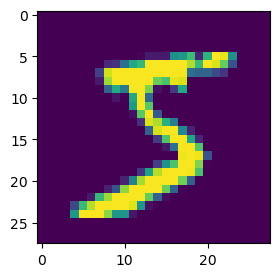

In [4]:
plt.figure(figsize=(3,4))
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

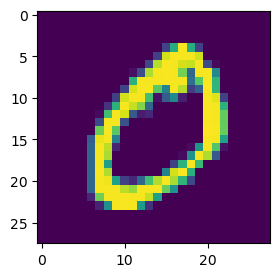

In [8]:
plt.figure(figsize=(3,4))
plt.imshow(X_train[1])
plt.grid(False)
plt.show()

### Model 1 - Baseline

In [18]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [19]:
model.compile(optimizer=keras.optimizers.Adam(),
             metrics=keras.metrics.CategoricalAccuracy(),
             loss=keras.losses.CategoricalCrossentropy())

In [20]:
model.build()

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2228 - categorical_accuracy: 0.9321 - val_loss: 0.0577 - val_categorical_accuracy: 0.9835
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0876 - categorical_accuracy: 0.9729 - val_loss: 0.0439 - val_categorical_accuracy: 0.9872
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0698 - categorical_accuracy: 0.9784 - val_loss: 0.0367 - val_categorical_accuracy: 0.9907
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0575 - categorical_accuracy: 0.9816 - val_loss: 0.0370 - val_categorical_accuracy: 0.9890
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0510 - categorical_accuracy: 0.9835 - val_loss: 0.0322 - val_categorical_accuracy: 0.9912
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0455 - categorical_accuracy: 0.9860 - val_loss: 0.0338 - val_categorical_accuracy: